In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import copy
import math


In [2]:
df = pd.read_csv("singe_feature_regression\income.data.csv")

In [3]:
df.head()

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


In [3]:
X = df.income
X.head()

0    3.862647
1    4.979381
2    4.923957
3    3.214372
4    7.196409
Name: income, dtype: float64

In [4]:
y = df.happiness
y.head()

0    2.314489
1    3.433490
2    4.599373
3    2.791114
4    5.596398
Name: happiness, dtype: float64

In [5]:
X = X.to_numpy()
y = y.to_numpy()

In [6]:
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [8]:
X_train.shape

(398,)

In [9]:
y_train.shape

(398,)

In [10]:
type(X_train)

numpy.ndarray

In [11]:
type(y_train)

numpy.ndarray

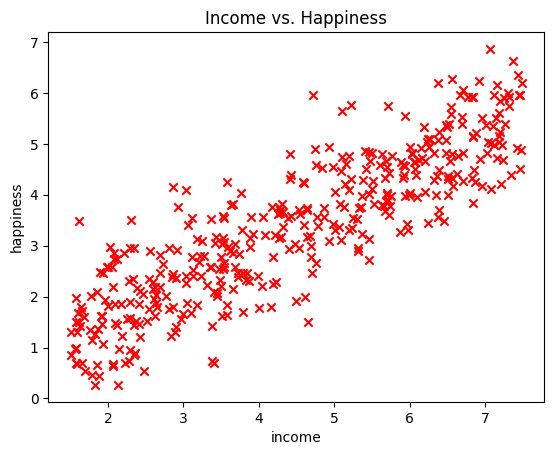

In [7]:
plt.scatter(X_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Income vs. Happiness")
# Set the y-axis label
plt.xlabel('income')
# Set the x-axis label
plt.ylabel('happiness')
plt.show()

In [8]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    total_cost = 0
    for i in range(m):
        total_cost += ((w*x[i] + b)-y[i])**2
    
    total_cost = (1/(2*m)) * total_cost

    return total_cost

In [9]:
def gradient_function(X,Y,W,B):
    m = X.shape[0]
    dw, db = 0, 0
    for i in range(m):
        f = W*X[i] + B
        dw = dw + (f-Y[i])*X[i]
        db = db + f-Y[i]
    dw = dw / m
    db = db / m
    return dw, db


In [12]:
def gradient_descent(X,Y,W,B,alpha):
    w = copy.deepcopy(W)
    b = B
    J_history = []
    w_history = []
    for i in range(10000):
        dw,db = gradient_function(X,Y,w,b)
        w = w - alpha*dw
        b = b  - alpha*db
        if i<10000:      # prevent resource exhaustion 
            cost =  compute_cost(X, Y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(10000/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
    return w, b


In [14]:
a = 0.01
w, b = gradient_descent(X_train,y_train,0,0,a)
print(w,b)

Iteration    0: Cost     4.02   
Iteration 1000: Cost     0.26   
Iteration 2000: Cost     0.26   
Iteration 3000: Cost     0.26   
Iteration 4000: Cost     0.26   
Iteration 5000: Cost     0.26   
Iteration 6000: Cost     0.26   
Iteration 7000: Cost     0.26   
Iteration 8000: Cost     0.26   
Iteration 9000: Cost     0.26   
0.7143313000458175 0.19183662137666682


In [17]:
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train[i] +b

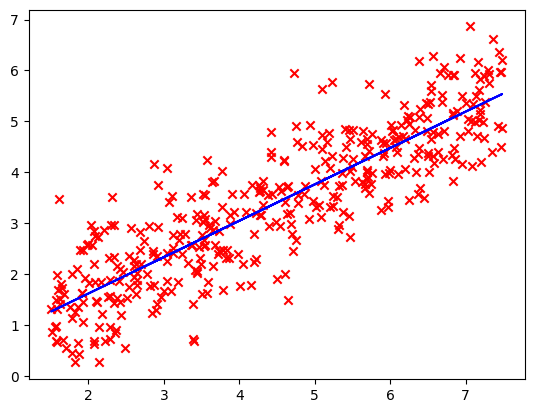

In [18]:
plt.plot(X_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X_train, y_train, marker='x', c='r') 
